In [32]:
import sarracen as src
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

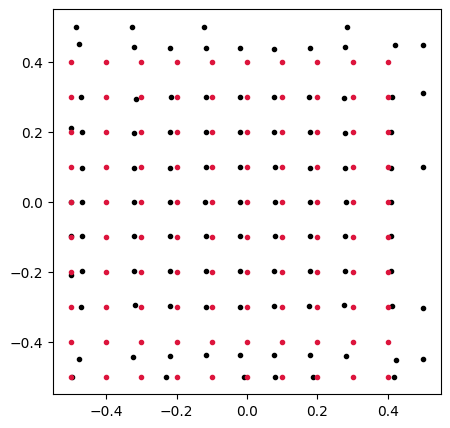

In [33]:
sdf_ini = pd.read_csv('../Data/initial_distribution/ideal_gas.csv')
sdf_n = pd.read_csv('../Data/results/ideal_gas/final.csv')

fig = plt.figure(figsize=(5,5))
plt.plot(sdf_n['x'], sdf_n['y'], '.', color='k')
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

In [34]:
sdf = src.read_csv('../Data/results/ideal_gas/final.csv')
sdf.params={'mass':1.0}
sdf.describe()

,x,y,vx,vy,u,h,rho
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,-0.020046,-0.010000,-0.100000,-2.775558e-18,1.022036,0.136692,81.385687
std,0.304807,0.304308,0.130913,1.208306e-01,0.145863,0.020690,19.547817
min,-0.499884,-0.499693,-0.713107,-3.130326e-01,0.807768,0.109525,29.233485
25%,-0.251016,-0.295632,-0.120489,-2.538454e-02,0.916771,0.120423,68.492651
50%,-0.019780,-0.000026,-0.097617,-2.143680e-04,0.996211,0.129935,85.293200
75%,0.209426,0.201379,-0.048862,2.554835e-02,1.071971,0.144997,99.298952
max,0.499732,0.499780,0.213683,4.028067e-01,1.655920,0.221943,120.042051


In [39]:
sdf1 = src.read_csv('../Data/results/ideal_gas/final.csv')
sdf1.params={'mass':1.0}
sdf1.describe()

,x,y,vx,vy,u,h,rho
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,-0.020046,-0.010000,-0.100000,-2.775558e-18,1.022036,0.136692,81.385687
std,0.304807,0.304308,0.130913,1.208306e-01,0.145863,0.020690,19.547817
min,-0.499884,-0.499693,-0.713107,-3.130326e-01,0.807768,0.109525,29.233485
25%,-0.251016,-0.295632,-0.120489,-2.538454e-02,0.916771,0.120423,68.492651
50%,-0.019780,-0.000026,-0.097617,-2.143680e-04,0.996211,0.129935,85.293200
75%,0.209426,0.201379,-0.048862,2.554835e-02,1.071971,0.144997,99.298952
max,0.499732,0.499780,0.213683,4.028067e-01,1.655920,0.221943,120.042051


In [40]:
np.sum(np.sum(sdf1 != sdf))

0

<Axes: xlabel='x', ylabel='y'>

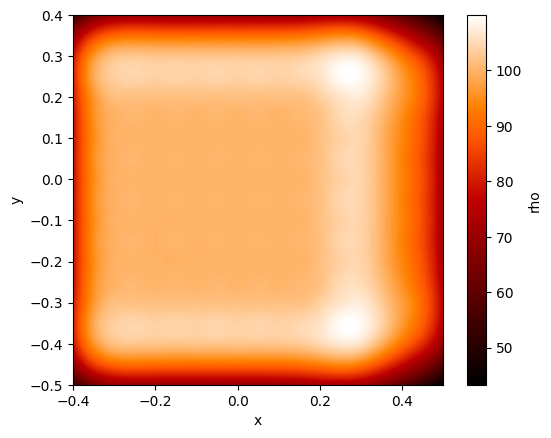

In [16]:
sdf.render('rho', xsec=0.0)

In [ ]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [ ]:
T = 3
time = range(0, T)
ang_mom = np.zeros(T)

fig = plt.figure()

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/toy_star/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    plt.clf()
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(time, ang_mom, '-', color='crimson')
plt.show()